In [113]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image

In [89]:
train_dir = 'Pneumonia_X_Ray/train'
val_dir = 'Pneumonia_X_Ray/val'
test_dir = 'Pneumonia_X_Ray/test'


In [90]:
train_datagen = ImageDataGenerator(
rescale=1./255, # Normalize pixel values to [0, 1]
shear_range=0.2, # Random shear
zoom_range=0.2, # Random zoom
horizontal_flip=True # Randomly flip images

)


In [91]:
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(

train_dir,

target_size=(150, 150), # Resize all images to 150x15@
batch_size=32, # Process 32 images at a time
class_mode='binary' # Binary classification: pneumonia or normal

)


Found 2040 images belonging to 2 classes.


In [92]:
val_generator = val_datagen.flow_from_directory(
val_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary'

)


Found 16 images belonging to 2 classes.


In [93]:
model = models.Sequential()


In [94]:
# First convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model .add(layers .MaxPooling2D((2, 2)))

# Second convolutional Layer
model .add(layers.Conv2D(64, (3, 3), activation='relu'))
model .add(layers.MaxPooling2D((2, 2)))

# Third convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model .add(layers.MaxPooling2D((2, 2)))

# Flatten the results to feed into a dense Layer
model .add(layers.Flatten())

# Fully connected Layer
model.add(layers.Dense(128, activation='relu'))

# Output Layer (binary classification)
model. add(layers.Dense(1, activation='sigmoid'))


In [95]:
model. compile(
optimizer=Adam(),
loss='binary_crossentropy' ,
metrics= [ 'accuracy' ]
)


In [96]:
# Model training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Set to a higher value for better results
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 470ms/step - accuracy: 0.8180 - loss: 0.4337 - val_accuracy: 0.8125 - val_loss: 0.4830
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 0.2201 - val_accuracy: 0.7500 - val_loss: 0.5367
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 489ms/step - accuracy: 0.8969 - loss: 0.2489 - val_accuracy: 0.8750 - val_loss: 0.3388
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.3521 - val_accuracy: 0.8750 - val_loss: 0.3347
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 477ms/step - accuracy: 0.9343 - loss: 0.1746 - val_accuracy: 0.6875 - val_loss: 0.7263
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 0.1345 - val_accuracy: 0.7500 - val_loss: 0.5742
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 500ms/step - accuracy: 0.9327 - loss: 0.1772 - val_accuracy: 0.8750 - val_loss: 0.4202
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.2119 - val_accuracy: 0.8750

In [97]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary'

)


Found 484 images belonging to 2 classes.


In [98]:
test_loss, test_acc = model.evaluate(test_generato
                                     r)
print(f"Test accuracy: {test_acc}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 276ms/step - accuracy: 0.7780 - loss: 0.5531
Test accuracy: 0.7706611752510071


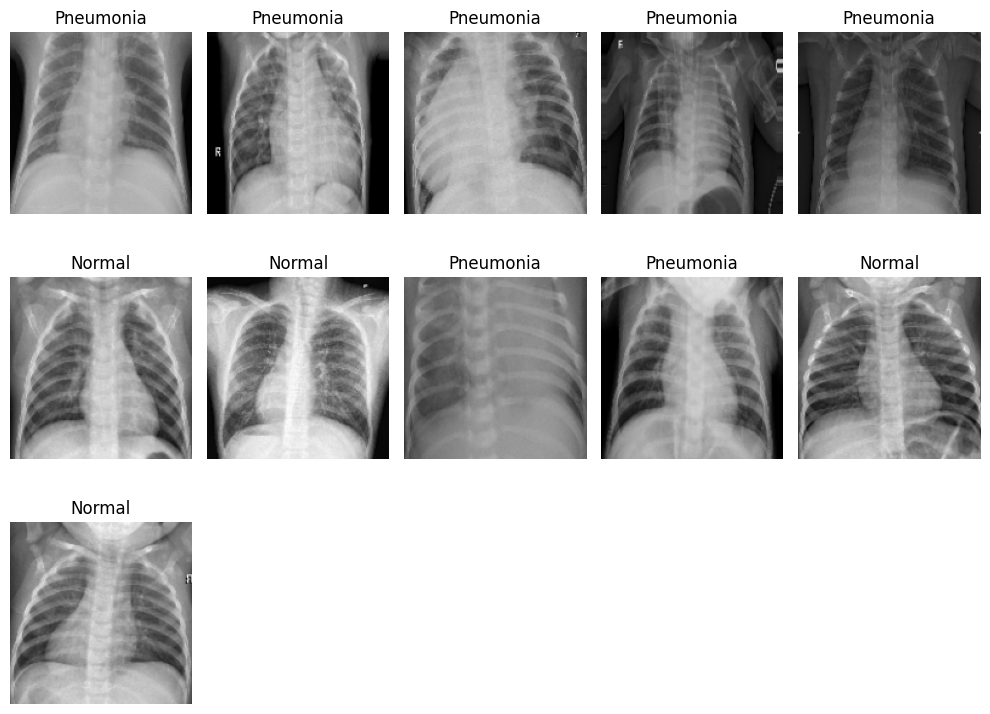

In [99]:
x_batch, y_batch = next(train_generator)

# Plotting the images in the batch
plt.figure(figsize=(10, 10))

for i in range(11):  # Display 11 images
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_batch[i])
    plt.title('Pneumonia' if y_batch[i] == 1 else 'Normal')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [100]:
test_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


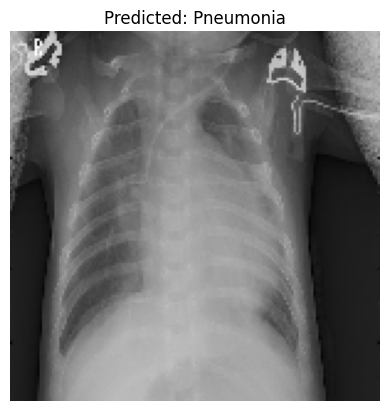

In [116]:
image_path = 'Pneumonia_X_Ray/test/PNEUMONIA/person1_virus_12.jpeg'  # Update with your image path

img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
class_label = 'Pneumonia' if prediction[0][0] > 0.5 else 'Normal'

plt.imshow(img)
plt.title(f"Predicted: {class_label}")
plt.axis('off')
plt.show()